In [12]:
from PIL import Image
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle

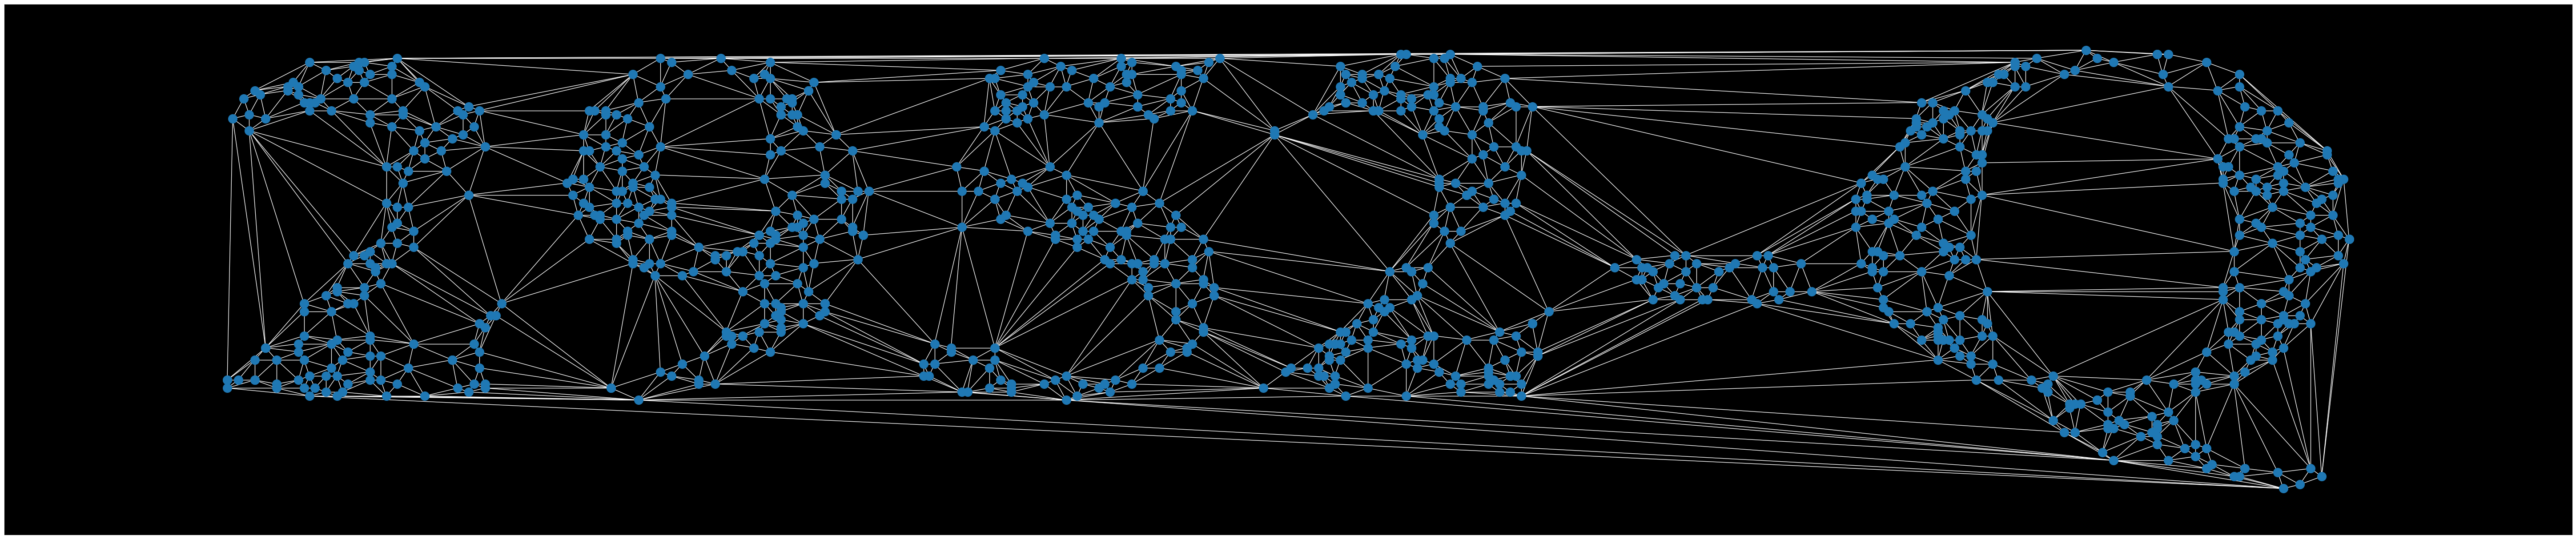

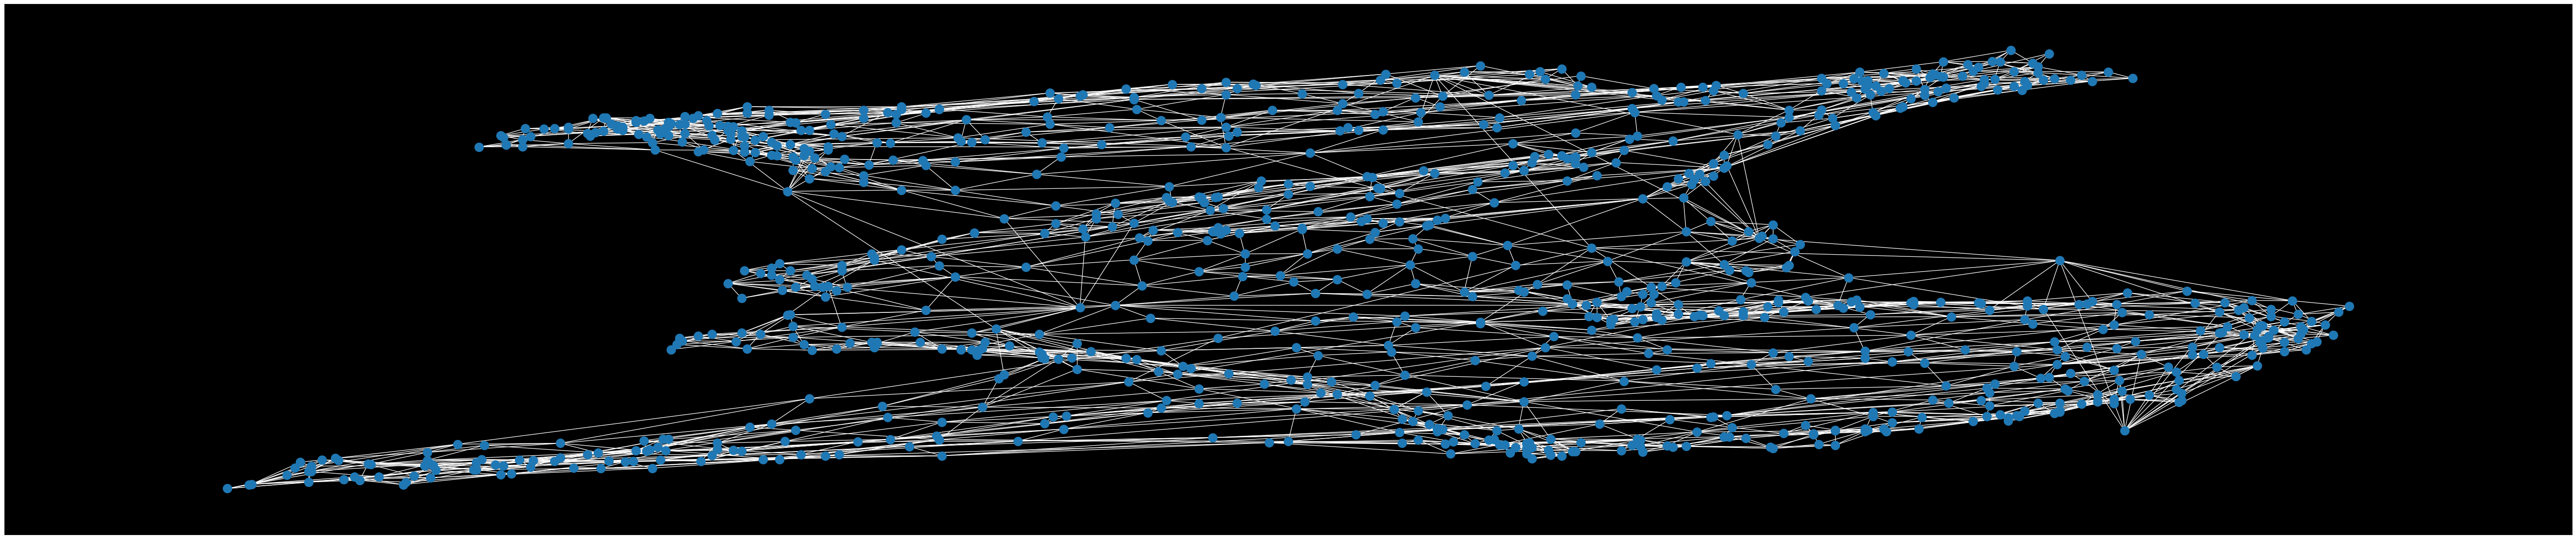

In [81]:
# Load the image
img = Image.open("image1.png").convert("L")  # Load as grayscale

# Convert the image to a numpy array
img_array = np.where(np.array(img) == 255, 0, 255)

# Calculate the probability distribution (normalized)
probability_distribution = img_array / np.sum(img_array)

# Flatten the image and probabilities
flattened_image = img_array.flatten()
flattened_probabilities = probability_distribution.flatten()

# Sample points
num_samples = 1000  # Adjust as needed
samples = np.random.choice(np.arange(len(flattened_image)), num_samples, p=flattened_probabilities)

# Create an empty image to overlay points
overlay_img = Image.new("L", img.size)

points = np.array(list(zip(*reversed(np.unravel_index(samples, img_array.shape)))))
points[:, 1] = np.max(points[:, 1]) - points[:, 1]

tri = Delaunay(points)

G = nx.Graph()
for i, point in enumerate(points):
    G.add_node(i, pos=(point[0], point[1]))

for simplex in tri.simplices:
    G.add_edge(simplex[0], simplex[1])
    G.add_edge(simplex[1], simplex[2])
    G.add_edge(simplex[2], simplex[0])

plt.figure(figsize=(74.5, 15.5))
plt.gca().set_facecolor('black')
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, pos, edge_color="white", with_labels=False, node_size=200)
plt.show()

spec_layout = nx.spectral_layout(G)

# write a pickle file to output vertices, edges, and pos
vertices = [i for i in range(len(points))]
edges = []
for simplex in tri.simplices:
    edges.append((simplex[0], simplex[1]))
    edges.append((simplex[1], simplex[2]))
    edges.append((simplex[2], simplex[0]))
layout = {i: [points[i, 0], points[i, 1], 0] for i in range(len(points))}

with open("graph.pkl", "wb") as file:
    pickle.dump({"vertices": vertices, "edges": edges, "layout": layout}, file)

components = nx.connected_components(G)

largest_cc = max(nx.connected_components(G), key=len)
plt.figure(figsize=(74.5, 15.5))
plt.gca().set_facecolor('black')
nx.draw_networkx(G.subgraph(largest_cc), spec_layout, edge_color="white", with_labels=False, node_size=200)
plt.show()
